In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.collections import LineCollection
import json

In [2]:
states=gpd.read_file('../data/Waller_Creek_Segments/Waller_Creek_Segments.shp')
drainage=gpd.read_file('../data/Eff_COA-HydrologicSpatial-Waller/WLR_Drainage_Boundary.shp')
stream=gpd.read_file('../data/Eff_COA-HydrologicSpatial-Waller/WLR_Modelstream.shp')
IC=gpd.read_file('../data/Eff_COA-HydrologicSpatial-Waller/WLR_IC.shp')
TC=gpd.read_file('../data/Eff_COA-HydrologicSpatial-Waller/WLR_TC.shp')


In [4]:
gauge = pd.DataFrame({'Raingauge':['Waller Creek at W Koenig Street','Waller Creek at E 45 Street','Waller Creek at Hemphill Park','Waller Creek at 23rd Street','Waller Creek at E 12th Street'],
     'Latitude': [3.12024067e+06,3.11873988e+06,3.11521287e+06,3.11714201e+06,3.11654350e+06],
     'Longitude': [1.009063881e+07,1.008537887e+07,1.008082418e+07, 1.00771e+07, 1.007137009e+07]})
junction = pd.DataFrame({'site':['LCRA'],
     'Latitude': [3.11698e+06],
     'Longitude': [1.007709e+07]})
monitoring = pd.DataFrame({'Raingauge':['Bridge2','Bridge3','Bridge4','Bridge5'],
     'Latitude': [3.11688990e+06,3.11689e+06,3.117106e+06,3.11693849e+06],
     'Longitude': [1.007818483e+07,1.007707e+07, 1.007594268e+07, 1.007756783e+07]})
LCRA_raingauge=gpd.GeoDataFrame(
    gauge, geometry=gpd.points_from_xy(gauge.Latitude,gauge.Longitude))
LCRA_junction=gpd.GeoDataFrame(
    junction, geometry=gpd.points_from_xy(junction.Latitude,junction.Longitude))
sensor=gpd.GeoDataFrame(
    monitoring, geometry=gpd.points_from_xy(monitoring.Latitude,monitoring.Longitude))


In [5]:
#states = states.to_crs(epsg=3857)
LCRA_raingauge = LCRA_raingauge.set_crs('epsg:2277')
LCRA_junction = LCRA_junction.set_crs('epsg:2277')
sensor = sensor.set_crs('epsg:2277')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


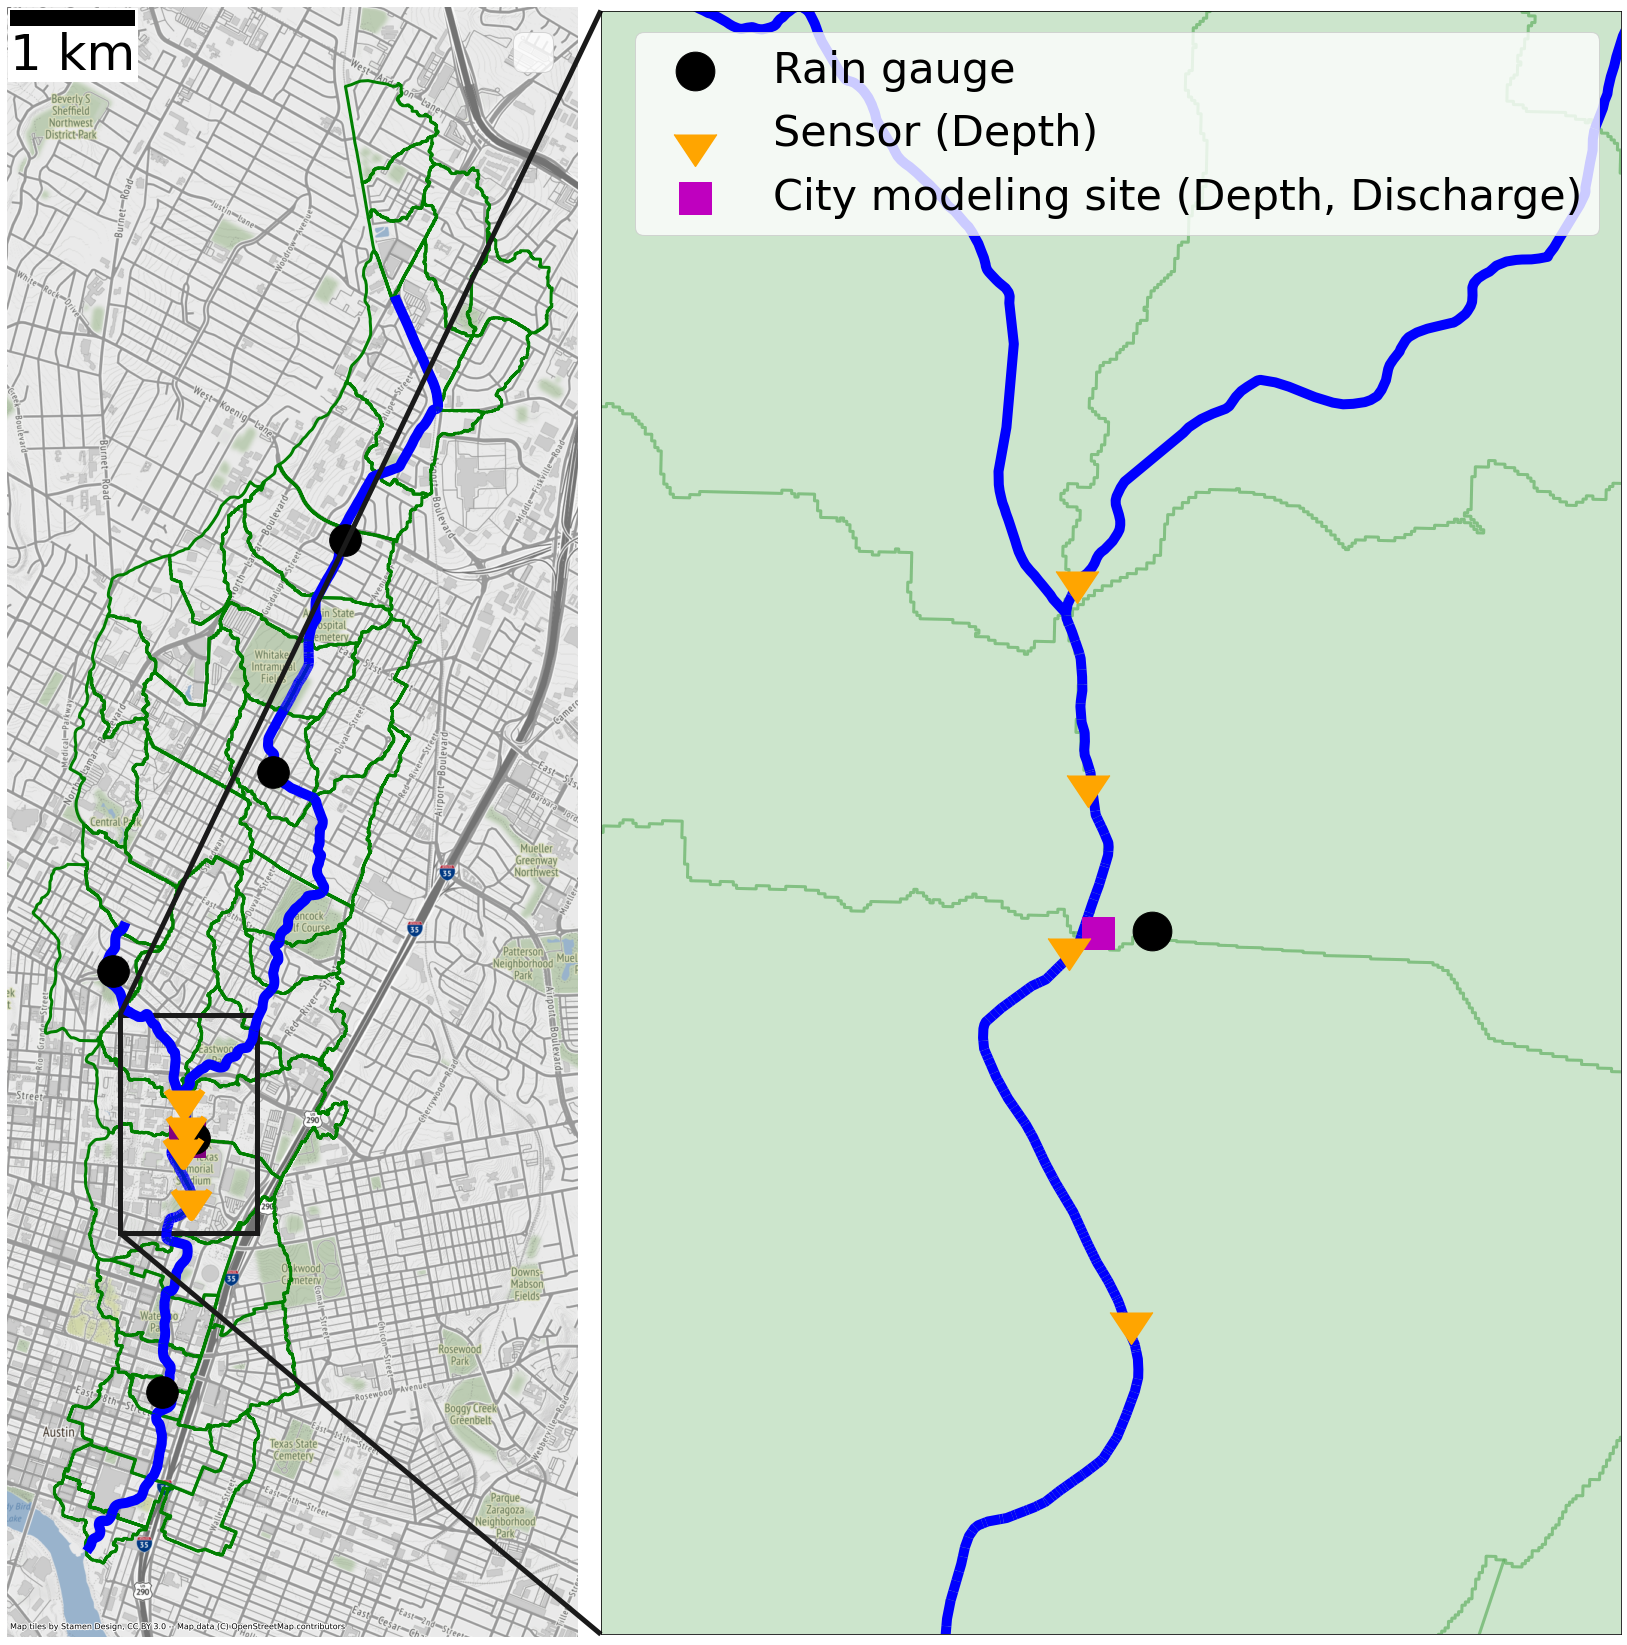

In [6]:
fig, ax = plt.subplots(figsize = (30,30))

states = states.to_crs(epsg=3857)
states.plot(ax=ax,edgecolor='b',linewidth=10)

drainage = drainage.to_crs(epsg=3857)
drainage.plot(ax=ax, edgecolor='green',color='none',linewidth=3)


LCRA_raingauge = LCRA_raingauge.to_crs(epsg=3857)
LCRA_raingauge.plot(ax=ax, color='k',markersize=1000,zorder=3)
LCRA_junction = LCRA_junction.to_crs(epsg=3857)
LCRA_junction.plot(ax=ax, marker='s' ,color='purple',markersize=1300)
sensor = sensor.to_crs(epsg=3857)
sensor.plot(ax=ax,marker=11, color='orange',linewidth=7,markersize=1300,zorder=5)
axins = zoomed_inset_axes(ax,7.43,loc='lower right',bbox_to_anchor=(2440, 268))

minx,miny,maxx,maxy =  states.query('REACH_NAME == "R_WLR16"').total_bounds
axins.set_xlim(minx-500, maxx+550)
axins.set_ylim(miny-750, maxy+650)

states.plot(ax=axins,edgecolor='b',linewidth=10)
drainage.plot(ax=axins, color='green',edgecolor="green", alpha=0.2,linewidth=3)
LCRA_raingauge.plot(ax=axins,color='k',markersize=1500,label='Rain gauge', zorder=3)
sensor.plot(ax=axins,marker=11,color='orange',markersize=1800, zorder=5,label='Sensor (Depth)')
LCRA_junction.plot(ax=axins, marker='s' ,color='m',markersize=1000,label='City modeling site (Depth, Discharge)', zorder=2)
mark_inset(ax, axins, loc1=2, loc2=3,fc="none", ec="0.1",linewidth=5)



# Plot zoom window

axins.plot()
ax.axis(False)
# Create scale bar
scalebar =  ScaleBar(
    dx=1,
    location="upper left",
    length_fraction=0.25 ,
    font_properties={
        "size": 50}
)# in relation to the whole plot
ax.add_artist(scalebar)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
cx.add_basemap(ax)
axins.axes.xaxis.set_visible(False)
axins.axes.yaxis.set_visible(False)
axins.legend(fontsize=43)
ax.legend(fontsize=50)

ax.set_axis_off()

plt.show()
